<a href="https://colab.research.google.com/github/kabta/Student-Performance-Prediction/blob/main/DS_Mini_project_2_Kabita_Adhikari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
import seaborn as sns



Reading csv file MP2_Data.csv

In [ ]:
df = pd.read_csv('/content/MP2_Data.csv')
df.head()


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


Finding correlation between all the features of given data set using Pearson correlation 


In [ ]:
df.corr(method ='pearson')

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
Week2_Quiz1,1.000000,0.739992,0.723109,0.677371,0.710990,0.635804,0.622655,0.746331,0.695119,0.739192,...,0.391529,0.390792,0.429210,0.018500,0.235174,0.472536,0.436145,0.213437,0.045046,0.689783
Week3_MP1,0.739992,1.000000,0.962502,0.905769,0.964849,0.881352,0.834397,0.879998,0.912700,0.965074,...,0.455459,0.477576,0.541086,0.037039,0.268698,0.549969,0.518334,0.154754,0.099824,0.901788
Week3_PR1,0.723109,0.962502,1.000000,0.890706,0.942896,0.868638,0.830599,0.904170,0.906560,0.952095,...,0.456261,0.403779,0.500834,0.022088,0.185638,0.561184,0.489662,0.170683,0.085965,0.887352
Week5_MP2,0.677371,0.905769,0.890706,1.000000,0.932880,0.904458,0.874247,0.808479,0.847296,0.962302,...,0.474257,0.509593,0.559422,0.032855,0.204243,0.581338,0.455110,0.149925,0.097039,0.953488
Week5_PR2,0.710990,0.964849,0.942896,0.932880,1.000000,0.897020,0.854744,0.863713,0.887432,0.968613,...,0.447560,0.520521,0.554598,0.037541,0.245074,0.549798,0.522180,0.165532,0.084738,0.907837
Week7_MP3,0.635804,0.881352,0.868638,0.904458,0.897020,1.000000,0.807097,0.781677,0.814492,0.957955,...,0.355063,0.429833,0.578306,-0.027907,0.225299,0.480964,0.503761,0.099568,0.053977,0.968130
Week7_PR3,0.622655,0.834397,0.830599,0.874247,0.854744,0.807097,1.000000,0.785238,0.814822,0.883680,...,0.480963,0.455430,0.498989,0.017352,0.274266,0.570810,0.569017,0.190900,0.104765,0.865616
Week4_Quiz2,0.746331,0.879998,0.904170,0.808479,0.863713,0.781677,0.785238,1.000000,0.912396,0.884461,...,0.406047,0.414378,0.491858,-0.003162,0.258997,0.480060,0.418012,0.157015,0.060867,0.810920
Week6_Quiz3,0.695119,0.912700,0.906560,0.847296,0.887432,0.814492,0.814822,0.912396,1.000000,0.910623,...,0.388557,0.420776,0.501814,0.028878,0.274749,0.495457,0.452735,0.173820,0.094437,0.849920
Week8_Total,0.739192,0.965074,0.952095,0.962302,0.968613,0.957955,0.883680,0.884461,0.910623,1.000000,...,0.445558,0.484388,0.577887,0.010636,0.249535,0.559333,0.521482,0.152608,0.083350,0.972348


Concatinating the related features and reducing the number of features

In [ ]:
df['Week_Stat0'] = df['Week1_Stat0']+df['Week2_Stat0']+df['Week3_Stat0']+df['Week4_Stat0']+df['Week5_Stat0']+df['Week6_Stat0']+df['Week7_Stat0']+df['Week8_Stat0']+df['Week9_Stat0']
df['Week_Stat1'] = df['Week1_Stat1']+df['Week2_Stat1']+df['Week3_Stat1']+df['Week4_Stat1']+df['Week5_Stat1']+df['Week6_Stat1']+df['Week7_Stat1']+df['Week8_Stat1']+df['Week9_Stat1']
df['Week_Stat2'] = df['Week1_Stat2']+df['Week2_Stat2']+df['Week3_Stat2']+df['Week4_Stat2']+df['Week5_Stat2']+df['Week6_Stat2']+df['Week7_Stat2']+df['Week8_Stat2']+df['Week9_Stat2']
df['Week_Stat3'] = df['Week1_Stat3']+df['Week2_Stat3']+df['Week3_Stat3']+df['Week4_Stat3']+df['Week5_Stat3']+df['Week6_Stat3']+df['Week7_Stat3']+df['Week8_Stat3']+df['Week9_Stat3']


Finding the corrlation between the newly introduced features

In [ ]:
df1 = df[['Week8_Total','Week_Stat0','Week_Stat1','Week_Stat2','Week_Stat3','Grade']]
correlation=df1.corr(method ='pearson')
round(correlation,2)
correlation

,Week8_Total,Week_Stat0,Week_Stat1,Week_Stat2,Week_Stat3,Grade
Week8_Total,1.000000,0.734958,0.833979,0.155891,0.424907,0.972348
Week_Stat0,0.734958,1.000000,0.818152,0.428821,0.622675,0.720340
Week_Stat1,0.833979,0.818152,1.000000,0.332783,0.537187,0.801245
Week_Stat2,0.155891,0.428821,0.332783,1.000000,0.164025,0.169317
Week_Stat3,0.424907,0.622675,0.537187,0.164025,1.000000,0.430672
Grade,0.972348,0.720340,0.801245,0.169317,0.430672,1.000000


Heat map showing the correlation between each new features

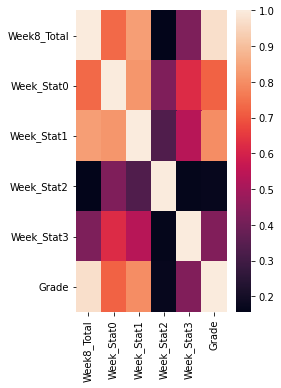

In [ ]:
sns.heatmap(correlation);

In [ ]:
df_modelset = df[['Week8_Total','Week_Stat0','Week_Stat1','Week_Stat3','Grade']]
df_modelset.head(10)

,Week8_Total,Week_Stat0,Week_Stat1,Week_Stat3,Grade
0,82.97,118,119,4,4
1,82.43,465,85,37,4
2,79.44,169,65,9,3
3,80.65,553,74,15,3
4,67.68,149,62,17,2
5,71.79,365,70,19,3
6,0.00,2,0,0,0
7,99.71,344,84,11,5
8,85.31,167,29,6,4
9,78.50,212,105,5,3


In [ ]:
df_modelset['is_train'] = np.random.uniform(0, 1, len(df_modelset)) <= .80
df_modelset.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Week8_Total,Week_Stat0,Week_Stat1,Week_Stat3,Grade,is_train
0,82.97,118,119,4,4,True
1,82.43,465,85,37,4,True
2,79.44,169,65,9,3,True
3,80.65,553,74,15,3,True
4,67.68,149,62,17,2,True
5,71.79,365,70,19,3,True
6,0.00,2,0,0,0,True
7,99.71,344,84,11,5,False
8,85.31,167,29,6,4,False
9,78.50,212,105,5,3,True


In [ ]:
train,test = df_modelset[df_modelset['is_train']==True], df_modelset[df_modelset['is_train']==False]

In [ ]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 91
Number of observations in the test data: 16


In [ ]:
# Create a list of the feature column's names
features = df_modelset.columns[:4]

# View features
features

Index(['Week8_Total', 'Week_Stat0', 'Week_Stat1', 'Week_Stat3'], dtype='object')

In [ ]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], train['Grade'])

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([5, 4, 5, 4, 0, 0, 3, 0, 5, 4, 0, 4, 4, 0, 0, 0])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]


array([[0.  , 0.  , 0.03, 0.22, 0.75],
       [0.06, 0.03, 0.24, 0.48, 0.19],
       [0.01, 0.  , 0.09, 0.24, 0.66],
       [0.  , 0.  , 0.07, 0.87, 0.06],
       [0.61, 0.34, 0.05, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.04, 0.83, 0.05, 0.07],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.17, 0.81],
       [0.  , 0.  , 0.03, 0.94, 0.03]])

In [ ]:
preds = clf.predict(test[features])
preds[0:10]


array([5, 4, 5, 4, 0, 0, 3, 0, 5, 4])

In [ ]:
test['Grade'].head()


7     5
8     4
13    5
17    4
19    0
Name: Grade, dtype: int64

Cross tab showing the predicted grade and actual grade

In [ ]:
pd.crosstab(test['Grade'], preds, rownames=['Actual Grade'], colnames=['Predicted Grade'])


Predicted Grade,0,3,4,5
Actual Grade,,,,
0,7,0,0,0
3,0,1,0,0
4,0,0,5,0
5,0,0,0,3


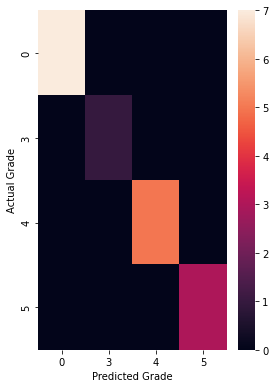

In [ ]:
heatmapRF = pd.crosstab(test['Grade'], preds, rownames=['Actual Grade'], colnames=['Predicted Grade'])
sns.heatmap(heatmapRF)

In [ ]:
length= len(preds)
length

16

In [ ]:
test['prediction'] = preds.tolist()
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Week8_Total,Week_Stat0,Week_Stat1,Week_Stat3,Grade,is_train,prediction
7,99.71,344,84,11,5,False,5
8,85.31,167,29,6,4,False,4
13,92.99,352,71,7,5,False,5
17,81.62,385,116,19,4,False,4
19,35.00,165,77,6,0,False,0
20,3.33,50,10,1,0,False,0
27,80.18,184,84,1,3,False,3
38,0.00,8,0,0,0,False,0
52,98.30,341,136,50,5,False,5
66,87.37,326,96,0,4,False,4


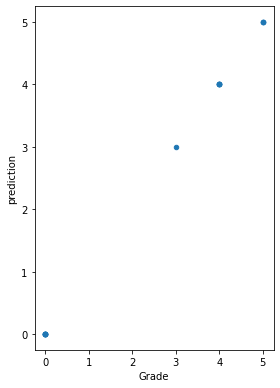

In [ ]:
#plot the scatter plot of variable in data
test.plot.scatter(x="Grade",y="prediction")
plt.show()

In [ ]:
#merging the prediction with original dataset
preds_comp1 = pd.merge(df,test, on=['Week8_Total','Week_Stat0','Week_Stat1','Week_Stat3'])

#print top 10 lines of the final predictions
print((preds_comp1).head(10))
print ("\n")

           ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0  ML-2020-11         5.00       15.0        5.0      20.00        5.0   
1  ML-2020-13         0.00       13.0        5.0      20.00        5.0   
2  ML-2020-21         3.33       12.0        5.0      19.13        5.0   
3  ML-2020-26         4.17       15.0        5.0      14.78        5.0   
4  ML-2020-29         5.00       15.0        5.0       0.00        0.0   
5  ML-2020-30         3.33        0.0        0.0       0.00        0.0   
6  ML-2020-38         3.33       14.0        5.0      18.70        5.0   
7  ML-2020-44         0.00        0.0        0.0       0.00        0.0   
8  ML-2020-52         0.00        0.0        0.0       0.00        0.0   
9  ML-2020-63         0.00        0.0        0.0       0.00        0.0   

   Week7_MP3  Week7_PR3  Week4_Quiz2  Week6_Quiz3  ...  Week9_Stat2  \
0      35.00        5.0         4.71          5.0  ...            1   
1      34.60        5.0         2.71       

In [ ]:
#Save the file to csv
preds_comp1.to_csv('RF_Predictions.csv', sep=',')

In [ ]:
accuracy_scoreRF = accuracy_score(test['Grade'], preds)
accuracy_scoreRF

1.0

In [ ]:
list(zip(train[features], clf.feature_importances_))

[('Week8_Total', 0.6332985085922032),
 ('Week_Stat0', 0.1338501322249551),
 ('Week_Stat1', 0.19617625480420686),
 ('Week_Stat3', 0.036675104378634776)]

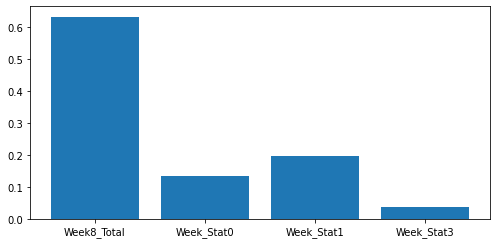

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(features, clf.feature_importances_)

# Display the plot
plt.show()

# **Naive Bayes classifier** 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [ ]:
df.head(3)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,Week_Stat0,Week_Stat1,Week_Stat2,Week_Stat3
0,ML-2020-1,5.00,15.0,5.0,16.09,5.0,21.88,5.0,5.0,5.0,...,4,8,6,1,0,4,118,119,8,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.0,22.27,5.0,4.0,5.0,...,0,25,3,2,5,4,465,85,17,37
2,ML-2020-3,1.67,13.0,5.0,15.22,5.0,27.05,2.5,5.0,5.0,...,0,9,0,1,0,3,169,65,8,9


In [ ]:
#Initialize Gaussian Naive Bayes
clf1 = GaussianNB()


In [ ]:
clf1.fit(train[features], train['Grade'])


GaussianNB()

In [ ]:
#Predicting for the Test Set
pred_clf1 = clf1.predict(test[features])


#Prediction Probability
prob_pos_clf1 = clf1.predict_proba(test[features])[:, 1]



In [ ]:
pred_clf1

array([5, 4, 5, 4, 0, 0, 3, 0, 5, 4, 0, 4, 4, 0, 0, 0])

In [ ]:
pred_clf1
length1= len(pred_clf1)
length1

16

In [ ]:
#Create the prediction file by concatenation of the original data and predictions
#Reshaping needed to perform the concatenation
pred_clf1_df = pd.DataFrame(pred_clf1.reshape(length1,1))

In [ ]:
#Column renaming to indicate the predictions
pred_clf1_df.rename(columns={0:'Prediction'}, inplace=True)
pred_clf1_df

,Prediction
0,5
1,4
2,5
3,4
4,0
5,0
6,3
7,0
8,5
9,4


In [ ]:
test[features]
test1=test
test1[features]

,Week8_Total,Week_Stat0,Week_Stat1,Week_Stat3
7,99.71,344,84,11
8,85.31,167,29,6
13,92.99,352,71,7
17,81.62,385,116,19
19,35.00,165,77,6
20,3.33,50,10,1
27,80.18,184,84,1
38,0.00,8,0,0
52,98.30,341,136,50
66,87.37,326,96,0


In [ ]:
#concatenating the two pandas dataframes over the columns to create a prediction dataset
test1['prediction'] = pred_clf1.tolist()
test1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Week8_Total,Week_Stat0,Week_Stat1,Week_Stat3,Grade,is_train,prediction
7,99.71,344,84,11,5,False,5
8,85.31,167,29,6,4,False,4
13,92.99,352,71,7,5,False,5
17,81.62,385,116,19,4,False,4
19,35.00,165,77,6,0,False,0
20,3.33,50,10,1,0,False,0
27,80.18,184,84,1,3,False,3
38,0.00,8,0,0,0,False,0
52,98.30,341,136,50,5,False,5
66,87.37,326,96,0,4,False,4


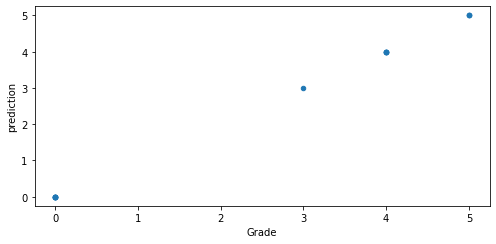

In [ ]:
#plot the scatter plot of variable in data
test.plot.scatter(x="Grade",y="prediction")
plt.show()

In [ ]:
#merging the prediction with original dataset
preds_comp2 = pd.merge(df,test1, on=['Week8_Total','Week_Stat0','Week_Stat1','Week_Stat3'])
#print top 10 lines of the final predictions
print((preds_comp2).head(10))
print ("\n")

           ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0  ML-2020-11         5.00       15.0        5.0      20.00        5.0   
1  ML-2020-13         0.00       13.0        5.0      20.00        5.0   
2  ML-2020-21         3.33       12.0        5.0      19.13        5.0   
3  ML-2020-26         4.17       15.0        5.0      14.78        5.0   
4  ML-2020-29         5.00       15.0        5.0       0.00        0.0   
5  ML-2020-30         3.33        0.0        0.0       0.00        0.0   
6  ML-2020-38         3.33       14.0        5.0      18.70        5.0   
7  ML-2020-44         0.00        0.0        0.0       0.00        0.0   
8  ML-2020-52         0.00        0.0        0.0       0.00        0.0   
9  ML-2020-63         0.00        0.0        0.0       0.00        0.0   

   Week7_MP3  Week7_PR3  Week4_Quiz2  Week6_Quiz3  ...  Week9_Stat2  \
0      35.00        5.0         4.71          5.0  ...            1   
1      34.60        5.0         2.71       

In [ ]:
#Save the file to csv
preds_comp2.to_csv('NB_Predictions.csv', sep=',')

In [ ]:
#Model Performance
#setting performance parameters
seed=7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)



In [ ]:
#calling the cross validation function
scoring='accuracy'
cv_results = model_selection.cross_val_score(GaussianNB(), train[features], train['Grade'], cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
#msg1= " %f " % ( cv_results.mean())
print(msg)

NB accuracy: 0.901111 (0.104757)


In [ ]:
list_Ascore=[]
list_Ascore.append(accuracy_scoreRF)
msg1= " %f " % ( cv_results.mean())
msg1=float(msg1)
list_Ascore.append(msg1)
algo_list=["Random Forest","Naive Bayes"]

list_Ascore



[1.0, 0.901111]

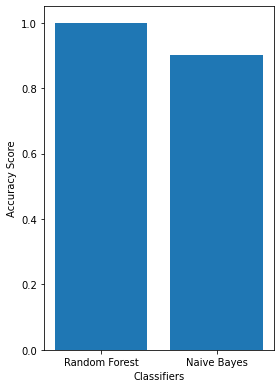

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [4.00, 5.50]
plt.rcParams["figure.autolayout"] = True


# Plot bar chart with data points
plt.bar(algo_list, list_Ascore)
# giving X and Y labels
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Score")

# Display the plot
plt.show()



> ## **Happy Learning ✌**






